08/04/2020

Keratinocyte Vocab Finder

In [1]:
# basic packages
import os, glob
import pandas as pd
import numpy as np; np.random.seed(0)
import itertools
from collections import Counter, defaultdict
import time
# Import tools needed for visualization
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt

In [2]:
save_dir = '../data/processed/fig4_modelling/vocab_sum/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
TISSUE = 'GDSD6'

In [4]:
MAX_DIST=135


In [5]:
#get tfs
tf_df = pd.read_csv('../data/external/transcription_factor_info_063020.csv')
TFS = sorted(set(tf_df[tf_df['cell_type']=='Keratinocytes']["tf"]))##### DIFFERENT FOR EACH TISSUE
print(len(TFS))
print(TFS)


97
['ATF1', 'ATF2', 'ATF3', 'ATF4', 'ATF5', 'BARX2', 'CEBPA', 'CEBPG', 'DLX3', 'DLX5', 'E2F1', 'E2F3', 'E2F4', 'E2F7', 'ELF5', 'ESRRA', 'ETS1', 'ETV4', 'FOS', 'FOSL1', 'FOSL2', 'FOXF2', 'FOXK2', 'FOXP1', 'GRHL1', 'GRHL2', 'HES1', 'HES2', 'HOMEZ', 'HOXA1', 'HOXC11', 'HOXC13', 'ID3', 'IRX2', 'IRX4', 'JUN', 'JUNB', 'JUND', 'KER2', 'KLF16', 'KLF4', 'KLF5', 'LDB2', 'MAF', 'MAFB', 'MAML3', 'NR3C1', 'OTX1', 'OVOL1', 'PBX1', 'PBX2', 'POU1F1', 'POU2F1', 'POU2F2', 'POU2F3', 'POU3F1', 'POU3F2', 'POU3F3', 'POU3F4', 'POU4F1', 'POU4F2', 'POU4F3', 'POU5F1', 'POU5F1B', 'POU6F1', 'POU6F2', 'PRDM1', 'PRRX1', 'RARG', 'RELB', 'RORA', 'RUNX1', 'SMAD4', 'SOX11', 'SOX15', 'SOX6', 'SOX7', 'SOX9', 'SP1', 'SP3', 'STAT1', 'STAT6', 'TCF4', 'TCF7L2', 'TFAP2A', 'TFAP2B', 'TFAP2C', 'TFAP2D', 'TFDP1', 'TP63', 'TWIST2', 'VDR', 'VGLL1', 'XBP1', 'ZBTB7B', 'ZEB1', 'ZNF219']


In [6]:
vocab_dir = '../data/processed/fig4_modelling/tf_tf_pairs/'

read in loop_types

In [7]:
glob.glob('../data/processed/fig4_modelling/tf_tf_pairs/'+'*loop_type*')

['../data/processed/fig4_modelling/tf_tf_pairs/expr_Astrocytes_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_GM12878_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Thyroid_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD0_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_Astrocytes_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Esophageal_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_HMEC_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_Esophageal_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Prostate_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD3_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_Ovarian_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Airway_loop_type.csv',
 

# 1 understand the types of vocabularies pulled out and where they come from

## 1A. enriched vocabularies from unique tissue genes

In [8]:
loop_type_df = pd.read_csv('../data/processed/fig4_modelling/tf_tf_pairs/unique_'+TISSUE+'_loop_type.csv',index_col=0).fillna('')
pro_pro_vocab = loop_type_df[(loop_type_df.pro_pro_count>0) & (loop_type_df.loop_loop_count==0) & (loop_type_df.pro_loop_count==0)].index.values
print(len(pro_pro_vocab))
print(pro_pro_vocab)
pro_loop_vocab = loop_type_df[(loop_type_df.pro_pro_count==0) & (loop_type_df.loop_loop_count==0) & (loop_type_df.pro_loop_count>0)].index.values
print(len(pro_loop_vocab))
print(pro_loop_vocab)

loop_loop_vocab = loop_type_df[(loop_type_df.pro_pro_count==0) & (loop_type_df.loop_loop_count>0) & (loop_type_df.pro_loop_count==0)].index.values
print(len(loop_loop_vocab))
print(loop_loop_vocab)

all_vocab = loop_type_df[(loop_type_df.pro_pro_count>0) & (loop_type_df.loop_loop_count>0) & (loop_type_df.pro_loop_count>0)].index.values
print(len(all_vocab))
print(all_vocab)


0
[]
0
[]
215
['BACH2::BARX2' 'BACH2::DLX2' 'BACH2::EGR2' 'BACH2::ELF5' 'BACH2::HOXD8'
 'BACH2::ID4' 'BACH2::IRX2' 'BACH2::MSX2' 'BACH2::NFATC4' 'BACH2::NR3C1'
 'BACH2::POU2F3' 'BACH2::SALL4' 'BACH2::TFE3' 'BACH2::TGIF1'
 'BACH2::ZNF467' 'BACH2::ZNF554' 'BARX2::DLX2' 'BARX2::EGR2' 'BARX2::EGR3'
 'BARX2::ELF5' 'BARX2::ESRRA' 'BARX2::HOXC13' 'BARX2::HOXD8' 'BARX2::ID4'
 'BARX2::IRX2' 'BARX2::MAF' 'BARX2::MSX2' 'BARX2::MZF1' 'BARX2::NFATC4'
 'BARX2::NR3C1' 'BARX2::PITX2' 'BARX2::POU2F3' 'BARX2::SALL4'
 'BARX2::TFE3' 'BARX2::TGIF1' 'BARX2::ZNF467' 'BARX2::ZNF554' 'DLX2::EGR2'
 'DLX2::EGR3' 'DLX2::ELF5' 'DLX2::HOXD8' 'DLX2::ID4' 'DLX2::MSX2'
 'DLX2::MZF1' 'DLX2::NFATC4' 'DLX2::NR3C1' 'DLX2::PITX2' 'DLX2::POU2F3'
 'DLX2::SALL4' 'DLX2::TFE3' 'DLX2::TGIF1' 'DLX2::ZNF467' 'DLX2::ZNF554'
 'EGR2::ESRRA' 'EGR2::HOXC13' 'EGR2::ID4' 'EGR2::IRX2' 'EGR2::MAF'
 'EGR2::MSX2' 'EGR2::MZF1' 'EGR2::PITX2' 'EGR2::POU2F3' 'EGR2::SALL4'
 'EGR2::TFE3' 'EGR2::ZNF554' 'EGR3::ELF5' 'EGR3::ESRRA' 'EGR3::HOXC13'
 'E

## 1b enriched vocab from expressed genes in KRT

In [9]:
loop_type_df = pd.read_csv('../data/processed/fig4_modelling/tf_tf_pairs/expr_'+TISSUE+'_loop_type.csv',index_col=0).fillna('')
pro_pro_vocab = loop_type_df[(loop_type_df.pro_pro_count>0) & (loop_type_df.loop_loop_count==0) & (loop_type_df.pro_loop_count==0)].index.values
print(len(pro_pro_vocab))
print(pro_pro_vocab)
pro_loop_vocab = loop_type_df[(loop_type_df.pro_pro_count==0) & (loop_type_df.loop_loop_count==0) & (loop_type_df.pro_loop_count>0)].index.values
print(len(pro_loop_vocab))
print(pro_loop_vocab)

loop_loop_vocab = loop_type_df[(loop_type_df.pro_pro_count==0) & (loop_type_df.loop_loop_count>0) & (loop_type_df.pro_loop_count==0)].index.values
print(len(loop_loop_vocab))
print(loop_loop_vocab)

all_vocab = loop_type_df[(loop_type_df.pro_pro_count>0) & (loop_type_df.loop_loop_count>0) & (loop_type_df.pro_loop_count>0)].index.values
print(len(all_vocab))
print(all_vocab)


0
[]
0
[]
692
['ARID3A::ATF7' 'ARID3A::CREB1' 'ARID3A::CREB5' 'ARID3A::CUX1'
 'ARID3A::NR2C2' 'ARID3A::TBX19' 'ARID3A::ZNF143' 'ASCL2::CUX1'
 'ASCL2::TBX19' 'ATF2::ZNF143' 'ATF4::CUX1' 'ATF4::FOXP2' 'ATF4::POU2F3'
 'ATF4::ZNF250' 'ATF7::CUX1' 'ATF7::E2F2' 'ATF7::HOXA5' 'ATF7::HOXA7'
 'ATF7::HOXC10' 'ATF7::IRF6' 'ATF7::ISL1' 'ATF7::NR2C2' 'ATF7::OVOL1'
 'ATF7::OVOL2' 'ATF7::SOX15' 'ATF7::ZNF250' 'BACH1::ZNF250' 'BCL11A::CUX1'
 'BCL11A::FOXP2' 'BCL6::CUX1' 'BCL6::E2F2' 'BCL6::HOXC6' 'BCL6::ZNF250'
 'CEBPB::CUX1' 'CEBPB::FOXP2' 'CEBPB::ISL1' 'CEBPB::POU2F3' 'CEBPB::TFE3'
 'CEBPB::ZNF143' 'CEBPB::ZNF250' 'CEBPB::ZNF329' 'CEBPD::CUX1'
 'CEBPD::E2F2' 'CEBPD::E2F8' 'CEBPD::ELF5' 'CEBPD::FOXP2' 'CEBPD::ISL1'
 'CEBPD::NR2C2' 'CEBPD::POU2F3' 'CEBPD::TBX19' 'CEBPD::TFE3'
 'CEBPD::ZNF143' 'CEBPD::ZNF250' 'CEBPG::CUX1' 'CEBPG::FOXP2'
 'CEBPG::POU2F3' 'CEBPG::ZNF250' 'CREB1::CUX1' 'CREB1::DBP' 'CREB1::DLX3'
 'CREB1::DLX5' 'CREB1::FOXA2' 'CREB1::HES5' 'CREB1::HOXA5' 'CREB1::HOXA7'
 'CREB1::IRF6' 'CRE

## 1C get motif appearance locations (normalized)

In [10]:
# for vocab pairs
pro_frac = ((loop_type_df.pro_pro_count+1)/(loop_type_df.pro_pro_count.sum()+1))
loop_frac = ((loop_type_df.loop_loop_count+1)/(loop_type_df.loop_loop_count.sum()+1))
ratio = pro_frac/loop_frac
ratio.sort_values()

FOS::PLAG1       0.188068
JUN::PLAG1       0.199706
PLAG1::SMAD3     0.217469
FOSL1::PLAG1     0.220440
JUND::PLAG1      0.220440
                  ...    
E2F2::OVOL1     40.340555
CUX1::OVOL2     80.681110
CUX1::OVOL1     80.681110
CUX1::HOXA5     80.681110
CUX1::TBX19     80.681110
Length: 3649, dtype: float64

In [11]:
# for motifs
# 1. get motifs
motifs = set()
for vocab_pair in loop_type_df.index.values:
    v1, v2 = vocab_pair.split('::')
    motifs.add(v1)
    motifs.add(v2)
motifs = sorted(motifs)
print(len(motifs))

# 2. initialize counts
motif_counts_dict = {}
for motif in motifs:
    motif_counts_dict[motif] = {'pro_pro_count':0,'loop_loop_count':0,'pro_loop_count':0} #list of counts for pro_pro_count, loop_loop_count, pro_loop_count, respectively
    
# 3. run through loop_type_df to fill in motif_counts_dict
for vocab_pair, row in loop_type_df.iterrows():
    v1, v2 = vocab_pair.split('::')
    motif_counts_dict[v1]['pro_pro_count'] +=row['pro_pro_count']
    motif_counts_dict[v2]['pro_pro_count'] +=row['pro_pro_count']
    motif_counts_dict[v1]['loop_loop_count'] +=row['loop_loop_count']
    motif_counts_dict[v2]['loop_loop_count'] +=row['loop_loop_count']
    motif_counts_dict[v1]['pro_loop_count'] +=row['pro_loop_count']
    motif_counts_dict[v2]['pro_loop_count'] +=row['pro_loop_count']
            
motif_counts_df = pd.DataFrame.from_dict(motif_counts_dict,orient='index')   
motif_counts_df_norm = motif_counts_df/motif_counts_df.sum(axis=0)


145


In [12]:
motif_counts_df_norm_sel = motif_counts_df_norm.reset_index()[motif_counts_df_norm.reset_index()['index'].isin(TFS)]
motif_counts_df_norm_sel.set_index('index',inplace=True)

In [13]:
motif_counts_df_norm.div(motif_counts_df_norm.sum(axis=1),axis=0)

,pro_pro_count,loop_loop_count,pro_loop_count
ARID3A,0.044856,0.609788,0.345356
ARID5B,0.330310,0.258772,0.410918
ASCL2,0.402876,0.273487,0.323637
ATF2,0.429405,0.281669,0.288927
ATF4,0.288443,0.384386,0.327172
...,...,...,...
ZNF436,0.243482,0.358157,0.398361
ZNF467,0.412118,0.306572,0.281310
ZNF554,0.337109,0.324760,0.338131
ZNF563,0.355671,0.295041,0.349288


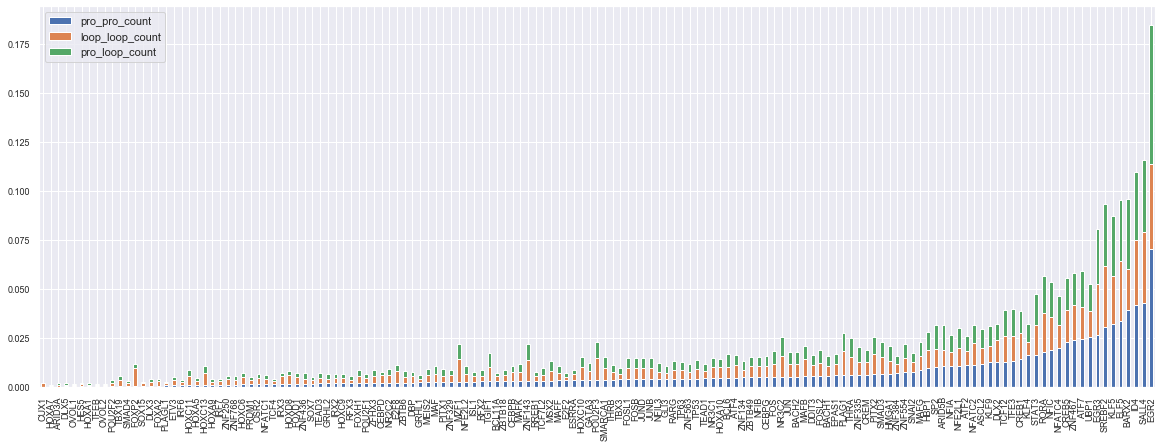

In [14]:
# all tfs
ax = motif_counts_df_norm.sort_values('pro_pro_count').plot(kind='bar', stacked=True,figsize = (20,7),fontsize=9)
ax.figure.savefig(os.path.join(save_dir, TISSUE+'_config_count_bar.pdf'))


this shows the likelihood of the motif appears in a vocab pair from pro_pro, pro_loop, or loop_loop configurations, GIVEN that it does appear at all (so normalized by both the probability of the configuration type)

this will show frequency of footprints being found in the looped regions 

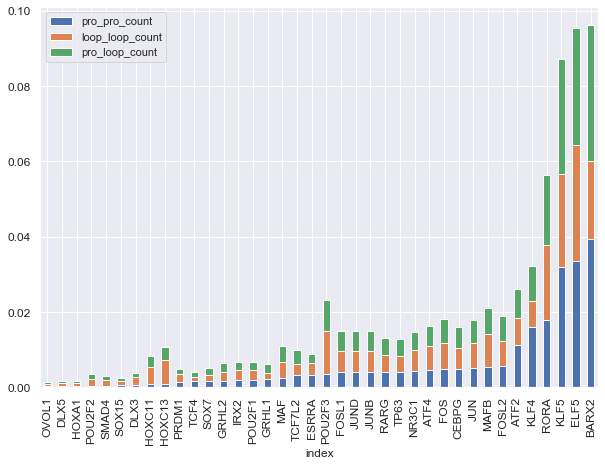

In [15]:
ax = motif_counts_df_norm_sel.sort_values('pro_pro_count').plot(kind='bar', stacked=True,figsize = (10,7),fontsize=12)
ax.figure.savefig(os.path.join(save_dir, TISSUE+'_config_count_sel_bar.pdf'))


same graph as before but only for tissue specific TFS

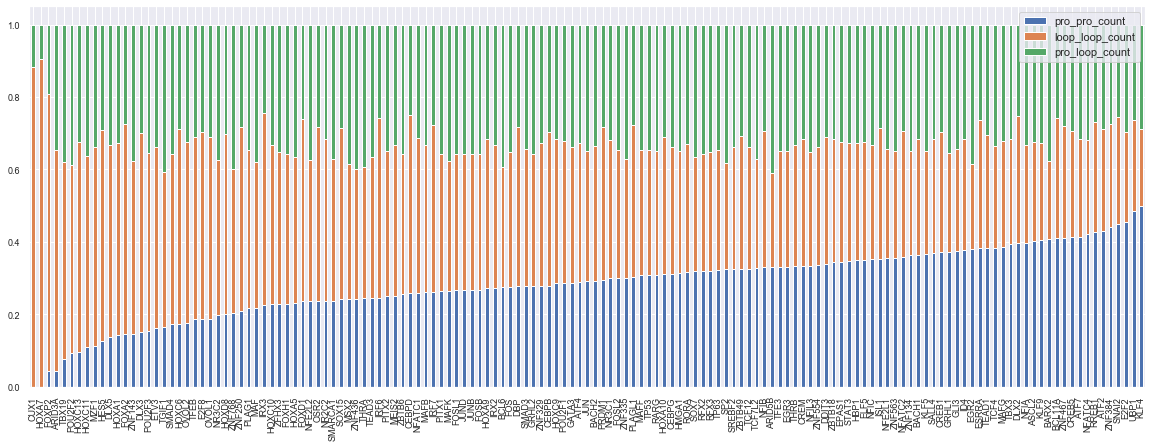

In [16]:
ax = motif_counts_df_norm.div(motif_counts_df_norm.sum(axis=1),axis=0).sort_values('pro_pro_count').plot(kind='bar', stacked=True,
                                                                                                    figsize = (20,7),fontsize=9)
ax.figure.savefig(os.path.join(save_dir, TISSUE+'_config_count_norm_bar.pdf'))


this shows the likelihood of the motif appears in a vocab pair from pro_pro, pro_loop, or loop_loop configurations, GIVEN that it does appear at all (so normalized by both the probability of the configuration type as well as by the motif frequency itself

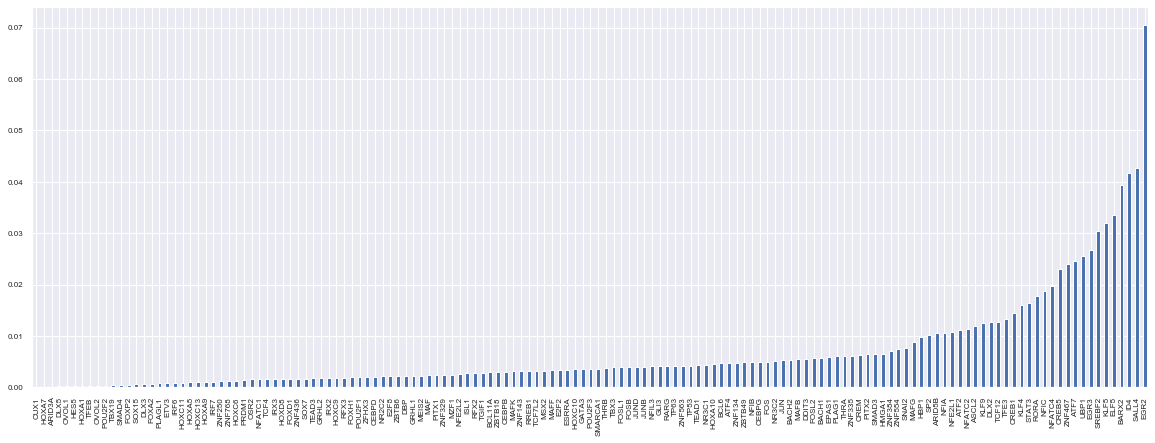

In [17]:
# fig,ax= plt.subplots(figsize = (20,7))
# ax.set_xlabel('xlabel', fontsize=6)

ax = motif_counts_df_norm.pro_pro_count.sort_values().plot(kind='bar',figsize = (20,7),fontsize=8)

ax.figure.savefig(os.path.join(save_dir, TISSUE+'_pro_count_norm_bar.pdf'))


only the promoter fractions

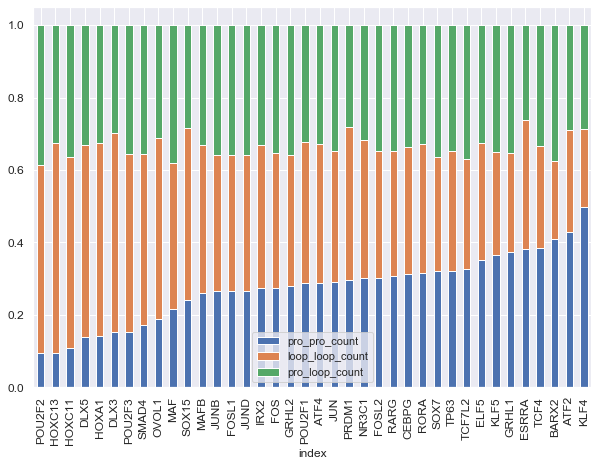

In [18]:
ax = motif_counts_df_norm_sel.div(motif_counts_df_norm_sel.sum(axis=1),axis=0).sort_values('pro_pro_count').plot(kind='bar', stacked=True,
                                                                                                    figsize = (10,7),fontsize=12)
ax.figure.savefig(os.path.join(save_dir, TISSUE+'_config_count_norm_sel_bar.pdf'))


In [19]:
motif_counts_df.div(motif_counts_df.sum(axis=1),axis=0)

,pro_pro_count,loop_loop_count,pro_loop_count
ARID3A,0.000888,0.974245,0.024867
ARID5B,0.014547,0.919639,0.065814
ASCL2,0.017036,0.933195,0.049769
ATF2,0.017737,0.938861,0.043402
ATF4,0.008876,0.954509,0.036614
...,...,...,...
ZNF436,0.007959,0.944688,0.047354
ZNF467,0.015745,0.945168,0.039086
ZNF554,0.012138,0.943586,0.044276
ZNF563,0.013984,0.936073,0.049943


# 2. Vocabulary genomic instances - setup


## 2A. find the locations

In [20]:
sorted(glob.glob('../data/processed/fig4_modelling/tf_tf_pairs_stability/'+'*vocab*'))

['../data/processed/fig4_modelling/tf_tf_pairs_stability/Airway_loop_loop_vocab_group.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/Airway_pro_pro_vocab_group.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/Airway_vocab_group.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/Bladder_loop_loop_vocab_group.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/GDSD6_loop_loop_vocab.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/GDSD6_loop_loop_vocab_group.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/GDSD6_pro_pro_vocab.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/GDSD6_vocab.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/GDSD6_vocab.xlsx',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/GM12878_loop_loop_vocab_group.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_stability/GM12878_pro_pro_vocab_group.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs_st

In [21]:
sorted(glob.glob(vocab_dir+'*vocab*'))

['../data/processed/fig4_modelling/tf_tf_pairs/expr_Airway_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Airway_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Astrocytes_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Astrocytes_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Bladder_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Bladder_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Esophageal_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Esophageal_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/ex

## 2B helper functions

In [8]:
def get_other_vocab_word(row, next_row):
    if row['vocab']!=next_row['vocab']:
        return False
    
    vocab_word = set(row['tf'])
    vocab_set = set(row['vocab'].split('::'))
    other_vocab = list(vocab_set -  vocab_word)[0]
    return other_vocab == next_row['tf']

def check_distance(row,next_row,max_dist=MAX_DIST):
    if row['chr_m']==next_row['chr_m']:
        if row['stop_m']<next_row['start_m']:
            tot_dist = next_row['stop_m'] - row['start_m']
            btn_dist = next_row['start_m'] - row['stop_m']
            return (tot_dist < max_dist), tot_dist, btn_dist
    return False,-1,-1

def check_tissue(row,next_row,tfs=TFS):
    if (row['tf'] in tfs) & (next_row['tf'] in tfs):
        return 'both'
    elif (row['tf'] in tfs) | (next_row['tf'] in tfs):
        return 'one'    
    else:
        return 'none'
    
def get_hits(vocab_file,tfs=TFS):
    print('**** reading', vocab_file)
    vocab_df = pd.read_csv(vocab_file)
    print(vocab_df.shape)
    idx = 0
    idx_hits = 0
    results_dict = {}
    while idx < (vocab_df.shape[0]-1):
        # look at next 
        row = vocab_df.iloc[idx,:]
        next_row = vocab_df.iloc[idx+1,:]

        check_vocab_pair = get_other_vocab_word(row,next_row)
        check_dist,tot_dist, btn_dist = check_distance(row, next_row)
        check_tissue_tf = check_tissue(row,next_row,tfs)
        if (check_dist and check_vocab_pair):
    #         print('hi',idx)
    #         print(row)
    #         print(next_row)

            results_dict[idx_hits] = {'vocab_pair':row['vocab'],'tot_dist':tot_dist,'btn_dist':btn_dist,
                                      'chr':row['chr'],'start':row['start_m'],'stop':next_row['stop_m'], 
                                      'vocab1':row['tf'],'vocab1_start':row['start_m'], 'vocab1_stop': row['stop_m'],
                                      'vocab2':next_row['tf'],'vocab2_start':next_row['start_m'], 'vocab2_stop': next_row['stop_m'],
                                      'genes':row['genes'],'num_genes':len(row['genes'].split('|')), 'tissue':row['tissue'],
                                     'check_tissuetf':check_tissue_tf}
            idx_hits+=1

        idx+=1
    print('num_hits',idx_hits)
    results_df = pd.DataFrame.from_dict(results_dict, orient='index')
    return results_df
    
def filter_results(results_df,min_hits_per_vocab=10):
    print('shape', results_df.shape)
    vocab_counts = results_df.vocab_pair.value_counts()
    print('original num vocab',vocab_counts.shape[0])
    vocab_to_include = vocab_counts[vocab_counts>min_hits_per_vocab].index.values
    print('filt num vocab',vocab_to_include.shape[0])
    
    results_df_filt = results_df[results_df.vocab_pair.isin(vocab_to_include)]
    return results_df_filt

    

# 3. Vocabulary genomic instances - running

## 3A get expression and stability for loop-loop regions

In [9]:
# ###TESTING PURPOSES
# vocab_df = pd.read_csv('../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_pro_pro_vocab_info.csv')
# print(vocab_df.shape)
# vocab_df[:5]

In [10]:
%%time
# filtered so that at least 10 genomic instances of vocab pair in significantly found in expressed genes 
results_expr_pro_pro = get_hits('../data/processed/fig4_modelling/tf_tf_pairs/expr_'+TISSUE+'_pro_pro_vocab_info.csv')
results_stability_pro_pro = get_hits('../data/processed/fig4_modelling/tf_tf_pairs_stability/'+TISSUE+'_pro_pro_vocab.csv')



**** reading ../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_pro_pro_vocab_info.csv
(33235, 15)
num_hits 5866
**** reading ../data/processed/fig4_modelling/tf_tf_pairs_stability/GDSD6_pro_pro_vocab.csv
(52520, 18)
num_hits 1378
CPU times: user 33.5 s, sys: 83.9 ms, total: 33.5 s
Wall time: 33.6 s


In [11]:
%%time
### TAKES AWHILE
results_expr_loop_loop = get_hits('../data/processed/fig4_modelling/tf_tf_pairs/expr_'+TISSUE+'_loop_loop_vocab_info.csv')
results_stability_loop_loop = get_hits('../data/processed/fig4_modelling/tf_tf_pairs_stability/'+TISSUE+'_loop_loop_vocab.csv')


**** reading ../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_loop_loop_vocab_info.csv
(264771, 15)
num_hits 33180
**** reading ../data/processed/fig4_modelling/tf_tf_pairs_stability/GDSD6_loop_loop_vocab.csv
(491218, 18)
num_hits 7741
CPU times: user 5min 7s, sys: 989 ms, total: 5min 8s
Wall time: 5min 5s


## 3B raw statistics (pre genomic instance filter)

In [12]:
motifs_pro_pro = sorted(set(list(results_expr_pro_pro.vocab1.unique())+list(results_expr_pro_pro.vocab2.unique())))
print('num motifs in pro_pro', len(motifs_pro_pro))
print(motifs_pro_pro)


motifs_loop_loop = sorted(set(list(results_expr_loop_loop.vocab1.unique())+list(results_expr_loop_loop.vocab2.unique())))
print('num motifs in loop_loop', len(motifs_loop_loop))
print(motifs_loop_loop)

num motifs in pro_pro 140
['ARID5B', 'ASCL2', 'ATF2', 'ATF4', 'ATF7', 'BACH1', 'BACH2', 'BARX2', 'BCL11A', 'BCL6', 'CEBPB', 'CEBPD', 'CEBPG', 'CREB1', 'CREB5', 'CREM', 'DBP', 'DDIT3', 'DLX2', 'DLX3', 'DLX5', 'E2F2', 'E2F8', 'EGR2', 'EGR3', 'ELF5', 'EPAS1', 'ESRRA', 'ETV3', 'FOS', 'FOSB', 'FOSL1', 'FOSL2', 'FOXA2', 'FOXD1', 'FOXH1', 'FOXP2', 'GATA3', 'GLI3', 'GRHL1', 'GRHL2', 'HBP1', 'HES5', 'HMGA1', 'HOXA1', 'HOXA10', 'HOXA5', 'HOXA9', 'HOXC10', 'HOXC11', 'HOXC13', 'HOXC6', 'HOXC9', 'HOXD8', 'ID4', 'IRF6', 'IRF7', 'IRX2', 'IRX3', 'ISL1', 'JUN', 'JUNB', 'JUND', 'KLF4', 'KLF5', 'KLF9', 'MAF', 'MAFB', 'MAFF', 'MAFG', 'MAFK', 'MEIS2', 'MSX2', 'MZF1', 'NFATC1', 'NFATC2', 'NFATC4', 'NFE2L1', 'NFE2L2', 'NFIA', 'NFIB', 'NFIC', 'NFIL3', 'NR2C2', 'NR3C1', 'NR3C2', 'OSR2', 'OVOL2', 'PITX1', 'PITX2', 'PLAG1', 'PLAGL1', 'POU2F1', 'POU2F2', 'POU2F3', 'PRDM1', 'RARG', 'RFX2', 'RFX3', 'RORA', 'RREB1', 'SALL4', 'SMAD3', 'SMAD4', 'SMARCA1', 'SNAI2', 'SOX15', 'SOX7', 'SP2', 'SREBF2', 'STAT3', 'TBX19', 'T

In [13]:
print('pre genomic instance filter')
print('num vocab in expression enrichment (pro-pro region): ', results_expr_pro_pro.vocab_pair.unique().shape[0])
print('num vocab in expression enrichment intersected with stability (pro-pro region): ', results_stability_pro_pro.vocab_pair.unique().shape[0])
print(results_stability_pro_pro.vocab_pair.unique())
print('num vocab in expression enrichment (loop-loop region): ', results_expr_loop_loop.vocab_pair.unique().shape[0])
print('num vocab in expression enrichment intersected with stability (loop-loop region): ', results_stability_loop_loop.vocab_pair.unique().shape[0])
print(results_stability_loop_loop.vocab_pair.unique())


pre genomic instance filter
num vocab in expression enrichment (pro-pro region):  1106
num vocab in expression enrichment intersected with stability (pro-pro region):  224
['ARID5B::ATF7' 'ARID5B::HOXC11' 'ARID5B::SREBF2' 'ARID5B::STAT3'
 'ARID5B::TCF12' 'ARID5B::TFE3' 'ATF2::ATF7' 'ATF2::E2F2' 'ATF2::EGR2'
 'ATF2::EGR3' 'ATF2::SREBF2' 'ATF4::ATF7' 'ATF4::BARX2' 'ATF4::E2F8'
 'ATF4::SP2' 'ATF4::SREBF2' 'ATF7::BACH1' 'ATF7::BARX2' 'ATF7::CEBPG'
 'ATF7::CREB1' 'ATF7::DDIT3' 'ATF7::E2F8' 'ATF7::EGR2' 'ATF7::EGR3'
 'ATF7::EPAS1' 'ATF7::FOS' 'ATF7::FOSB' 'ATF7::FOSL2' 'ATF7::HBP1'
 'ATF7::HMGA1' 'ATF7::JUN' 'ATF7::JUNB' 'ATF7::JUND' 'ATF7::KLF4'
 'ATF7::MAFF' 'ATF7::MAFG' 'ATF7::MAFK' 'ATF7::NFATC4' 'ATF7::NFE2L1'
 'ATF7::NFE2L2' 'ATF7::NFIA' 'ATF7::NFIB' 'ATF7::NFIC' 'ATF7::RREB1'
 'ATF7::SNAI2' 'ATF7::SP2' 'ATF7::SREBF2' 'ATF7::TEAD1' 'ATF7::TP63'
 'ATF7::UBP1' 'ATF7::ZNF335' 'BACH1::BARX2' 'BACH1::EGR2' 'BACH1::NFATC4'
 'BACH1::SREBF2' 'BARX2::FOXH1' 'BARX2::HBP1' 'BARX2::HOXA10'
 'BARX2

## 3C. filter expression enriched vocab words if then have at least 10 genomic instances then get stats

In [14]:
results_expr_pro_pro = filter_results(results_expr_pro_pro,min_hits_per_vocab=10)
# print(results_expr_pro_pro.vocab_pair.unique().shape)
# results_expr_pro_pro.vocab_pair.unique()

shape (5866, 16)
original num vocab 1106
filt num vocab 105


In [15]:
results_expr_loop_loop = filter_results(results_expr_loop_loop,min_hits_per_vocab=10)
# print(results_expr_loop_loop.vocab_pair.unique().shape)
# results_expr_loop_loop.vocab_pair.unique()

shape (33180, 16)
original num vocab 2200
filt num vocab 525


In [16]:
results_stability_pro_pro = filter_results(results_stability_pro_pro,min_hits_per_vocab=10)
results_stability_loop_loop = filter_results(results_stability_loop_loop,min_hits_per_vocab=10)


shape (1378, 16)
original num vocab 224
filt num vocab 26
shape (7741, 16)
original num vocab 384
filt num vocab 94


In [17]:
print('post genomic instance filter')
print('num vocab in expression enrichment (pro-pro region): ', results_expr_pro_pro.vocab_pair.unique().shape[0])
print('num vocab in expression enrichment intersected with stability (pro-pro region): ', results_stability_pro_pro.vocab_pair.unique().shape[0])
print(results_stability_pro_pro.vocab_pair.unique())
print('num vocab in expression enrichment (loop-loop region): ', results_expr_loop_loop.vocab_pair.unique().shape[0])
print('num vocab in expression enrichment intersected with stability (loop-loop region): ', results_stability_loop_loop.vocab_pair.unique().shape[0])
print(results_stability_loop_loop.vocab_pair.unique())


post genomic instance filter
num vocab in expression enrichment (pro-pro region):  105
num vocab in expression enrichment intersected with stability (pro-pro region):  26
['ARID5B::ATF7' 'ARID5B::TCF12' 'ARID5B::TFE3' 'ATF4::BARX2' 'ATF7::BARX2'
 'ATF7::SP2' 'ATF7::UBP1' 'BACH1::EGR2' 'BARX2::HBP1' 'BARX2::HOXA10'
 'BARX2::MAFG' 'BARX2::POU2F1' 'BARX2::UBP1' 'EGR2::MAFF' 'EGR2::MAFG'
 'EGR2::NFE2L1' 'EGR2::NFIA' 'EGR2::SREBF2' 'EGR2::TP63' 'EGR3::NFIA'
 'KLF4::SREBF2' 'MAFG::NFATC4' 'NFIB::SP2' 'NFIC::SP2' 'SREBF2::UBP1'
 'TCF12::UBP1']
num vocab in expression enrichment (loop-loop region):  525
num vocab in expression enrichment intersected with stability (loop-loop region):  94
['ARID5B::ATF7' 'ARID5B::HOXC11' 'ARID5B::SREBF2' 'ARID5B::TCF12'
 'ARID5B::TFE3' 'ARID5B::ZNF143' 'ATF4::BARX2' 'ATF4::EGR2' 'ATF4::SP2'
 'ATF7::BARX2' 'ATF7::EGR2' 'ATF7::HMGA1' 'ATF7::KLF4' 'ATF7::NFE2L1'
 'ATF7::NFIA' 'ATF7::SP2' 'ATF7::UBP1' 'BACH1::BARX2' 'BACH1::EGR2'
 'BACH1::NFATC4' 'BARX2::FOXH1' 'BA

## 3D filter expr vocab words based on whether there is they are annotated for skin

In [18]:
results_expr_pro_pro[['vocab_pair','check_tissuetf']].drop_duplicates().check_tissuetf.value_counts()

none    67
one     45
both    38
Name: check_tissuetf, dtype: int64

In [19]:
results_expr_loop_loop[['vocab_pair','check_tissuetf']].drop_duplicates().check_tissuetf.value_counts()

none    336
one     212
both    188
Name: check_tissuetf, dtype: int64

shows fraction of vocab words having tissue specific motif configuration (`both` are tissue specific, `one` is tissue specific, or `none` are)


MAKE SURE #s are around 40 ish so pick `one` or `both`

In [20]:
filter_thres = ['both']#'both' # 'one'#'none','one',
results_expr_pro_pro_tissue = results_expr_pro_pro[results_expr_pro_pro.check_tissuetf.isin(filter_thres)]
print('pro-pro region')
print('total vocab:',results_expr_pro_pro.vocab_pair.unique().shape[0],'tissue annon vocab:', results_expr_pro_pro_tissue.vocab_pair.unique().shape[0])
print(results_expr_pro_pro_tissue.vocab_pair.unique())

results_expr_loop_loop_tissue = results_expr_loop_loop[results_expr_loop_loop.check_tissuetf.isin(filter_thres)]
print('loop-loop region')
print('total vocab:',results_expr_loop_loop.vocab_pair.unique().shape[0],'tissue annon vocab:', results_expr_loop_loop_tissue.vocab_pair.unique().shape[0])
print(results_expr_loop_loop_tissue.vocab_pair.unique())

pro-pro region
total vocab: 105 tissue annon vocab: 38
['ASCL2::KLF4' 'ATF2::BARX2' 'ATF4::BARX2' 'ATF7::BARX2' 'BARX2::CEBPD'
 'BARX2::CREB5' 'BARX2::CREM' 'BARX2::EGR3' 'BARX2::ELF5' 'BARX2::GATA3'
 'BARX2::HOXA10' 'BARX2::ID4' 'BARX2::MAFG' 'BARX2::NFIC' 'BARX2::NFIL3'
 'BARX2::POU2F1' 'BARX2::SALL4' 'BARX2::SOX7' 'BARX2::TEAD3' 'EGR2::KLF4'
 'EGR2::KLF5' 'EGR2::TP63' 'EGR3::KLF4' 'EGR3::KLF5' 'ELF5::KLF4'
 'ELF5::KLF5' 'ELF5::NFATC4' 'ID4::KLF4' 'ID4::RORA' 'KLF4::SALL4'
 'KLF4::SREBF2' 'KLF5::MAFG' 'KLF5::NFIC' 'KLF5::SALL4' 'KLF5::SREBF2'
 'KLF5::ZBTB6' 'KLF5::ZNF563' 'RORA::ZNF467']
loop-loop region
total vocab: 525 tissue annon vocab: 188
['ARID3A::KLF5' 'ASCL2::KLF4' 'ATF2::BARX2' 'ATF2::KLF5' 'ATF2::NFATC4'
 'ATF2::RORA' 'ATF4::BARX2' 'ATF4::KLF5' 'ATF7::BARX2' 'ATF7::KLF4'
 'ATF7::KLF5' 'BACH1::KLF5' 'BACH1::RORA' 'BACH2::RORA' 'BARX2::CEBPD'
 'BARX2::CEBPG' 'BARX2::CREB5' 'BARX2::CREM' 'BARX2::DLX3' 'BARX2::EGR3'
 'BARX2::ELF5' 'BARX2::FOXH1' 'BARX2::GATA3' 'BARX2::HOXA10' 

## 3E add in stability scores vocab pairs that pass the genomic instance filter and get genomic instance counts

In [24]:
def get_counts(results_df, label):
    vocab_to_checktissue = pd.Series(results_df.check_tissuetf.values, index=results_df.vocab_pair.values).to_dict()
    counts_df = pd.DataFrame(results_df.vocab_pair.value_counts())
    counts_df.columns = ['num_instance']
    counts_df['label']=label
    counts_df.index.set_names('vocab',inplace=True)
    counts_df.reset_index(inplace=True)

    counts_df['check_tissue'] = counts_df.vocab.map(vocab_to_checktissue)
    return counts_df

In [25]:
vocab_summary_df = pd.concat([ get_counts(results_stability_pro_pro, 'stability_pro'),
            get_counts(results_expr_pro_pro_tissue, 'expr_pro_tissue'),
            get_counts(results_stability_loop_loop, 'stability_loop'),
            get_counts(results_expr_loop_loop_tissue, 'expr_loop_tissue')],axis=0)
vocab_summary_df = vocab_summary_df.groupby('vocab').agg({'num_instance':sum, 'check_tissue':lambda x: ''.join(list(set(x))),'label':'|'.join}).reset_index()
vocab_summary_df['tissue']=TISSUE
vocab_summary_df.label.value_counts()
# results_stability_loop_loop.vocab_pair.unique()

expr_loop_tissue                                                 141
stability_loop                                                    59
expr_pro_tissue|expr_loop_tissue                                  31
stability_pro|stability_loop                                      19
stability_loop|expr_loop_tissue                                    9
stability_pro|expr_pro_tissue|stability_loop|expr_loop_tissue      7
Name: label, dtype: int64

In [26]:
vocab_summary_df[:5]

,vocab,num_instance,check_tissue,label,tissue
0,ARID3A::KLF5,21,both,expr_loop_tissue,GDSD6
1,ARID5B::ATF7,119,none,stability_pro|stability_loop,GDSD6
2,ARID5B::HOXC11,64,none,stability_loop,GDSD6
3,ARID5B::SREBF2,131,none,stability_loop,GDSD6
4,ARID5B::TCF12,129,none,stability_pro|stability_loop,GDSD6


In [27]:
vocab_summary_df.to_csv(os.path.join(save_dir, TISSUE+'_vocab_summary.csv'))